<a href="https://colab.research.google.com/github/inunezfe/cs501hw/blob/main/CS501_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
from scipy.interpolate import CubicSpline
plt.style.use('seaborn-poster')
%matplotlib inline

### **Homework #3**

## Ivan Arturo Nuñez Ferro

### **First Point**

Consider the following set of points

$(0, 10) \quad (1, −2) \quad (2, 3) \quad (3, −10) \quad (4, 16)$






##### $(i)$ Compute the interpolating polynomial using Van Der Monde form

In [ ]:
x = np.array([0,1,2,3,4])
y = np.array([10,-2,3,-10,16])

v = np.vander(x,increasing=True)

s = np.linalg.solve(v,y)

# for the poly

poly = np.polynomial.polynomial.Polynomial(s)

xp,yp = poly.linspace(50,[0,4])

print(f'The polynomial for the problem using the Van Der Monde form is {poly}')

The polynomial for the problem using the Van Der Monde form is 10.0 - 55.16666666666666·x¹ + 68.16666666666666·x² -
28.833333333333332·x³ + 3.8333333333333335·x⁴


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


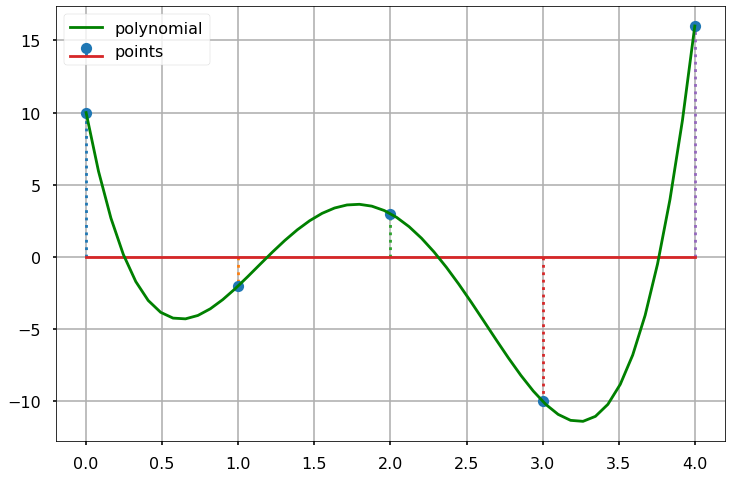

In [ ]:
plt.figure(figsize = (12, 8))
plt.grid()
## Plot resulting polynomial
plt.stem(x, y, linefmt=':', label='points')
plt.plot(xp,yp, label = 'polynomial', color = 'green')
plt.legend()


##### $(ii)$ For the same set of points, compute the polynomial using Lagrange form.

In [ ]:
pl = interpolate.lagrange(x,y)
p_l = np.polynomial.polynomial.Polynomial(pl.coef[::-1])

xl,yl = poly.linspace(50,[0,4])

print(f'The polynomial for the problem using the Lagrange form is {p_l}')




The polynomial for the problem using the Lagrange form is 10.0 - 55.16666666666666·x¹ + 68.16666666666666·x² -
28.833333333333332·x³ + 3.833333333333333·x⁴


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


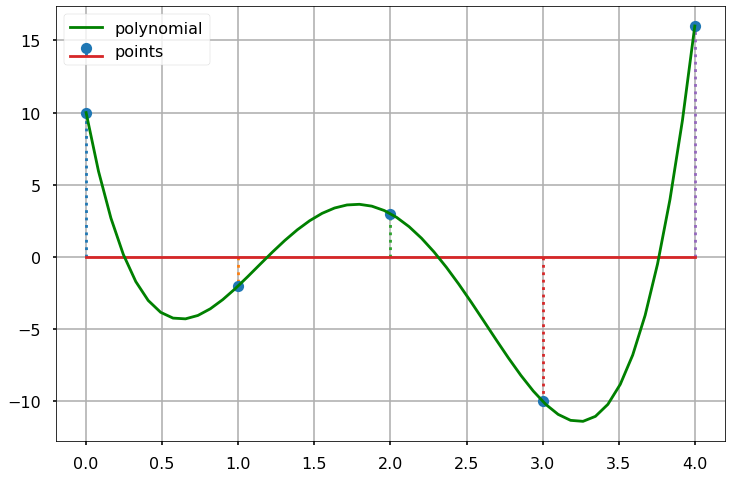

In [ ]:
plt.figure(figsize = (12, 8))
plt.grid()
## Plot resulting polynomial
plt.stem(x, y, linefmt=':', label='points')
plt.plot(xl,yl, label = 'polynomial', color = 'green')
plt.legend()


##### $(iii)$ For the same set of points, compute the polynomial using Newton form.

In [ ]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

The polynomial for the problem using the Newton form is 10.0 - 12.0·x¹ + 8.5·x² - 5.833333333333333·x³ + 3.833333333333333·x⁴


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


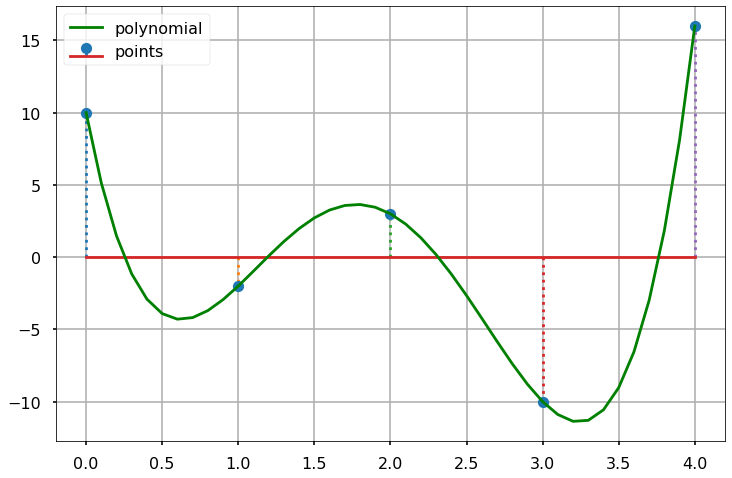

In [ ]:
from numpy.lib import polynomial
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)

p_n = np.polynomial.polynomial.Polynomial(a_s)

print(f'The polynomial for the problem using the Newton form is {p_n}')


plt.figure(figsize = (12, 8))
plt.grid()
## Plot resulting polynomial
plt.stem(x, y, linefmt=':', label='points')
plt.plot(x_new,y_new, label = 'polynomial', color = 'green')
plt.legend()


### **Second Point**

For the function $f(x) = \frac{2}{1+x^2}$ over the interval $[-1,1]$

##### $(i)$ Fit a Hermite cubic interpolant for intervals $[−1, 0]$ and $[0, 1]$.

In [ ]:
x = np.linspace(-1, 1)
x_1 = np.linspace(-1, 0)
x_2 = np.linspace(0, 1)

y = 2/(1+x**2)
y_1 = 2/(1+x_1**2)
y_2 = 2/(1+x_2**2)


h_1 = np.polynomial.hermite.hermfit(x_1,y_1,3)
poly_h1 = np.polynomial.hermite.herm2poly(h_1)
p_h1 = np.polynomial.polynomial.Polynomial(poly_h1)

h_2 = np.polynomial.hermite.hermfit(x_2,y_2,3)
poly_h2 = np.polynomial.hermite.herm2poly(h_2)
p_h2 = np.polynomial.polynomial.Polynomial(poly_h2)



Text(0.5, 1.0, 'Function over the interval [0,2]')

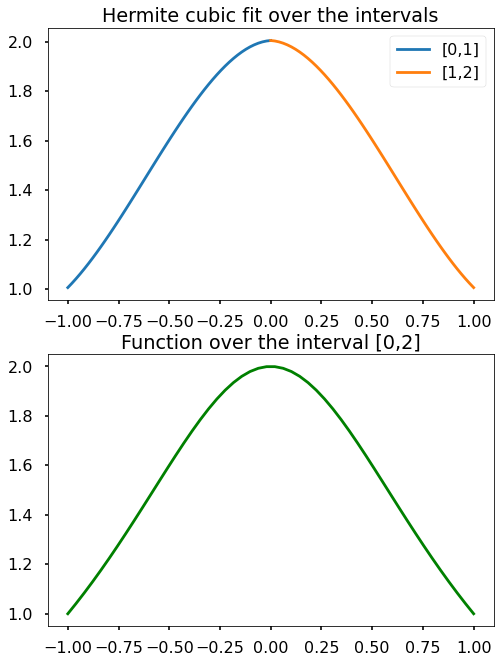

In [ ]:
plt.figure(figsize = (8, 11))

plt.subplot(2,1,1)

plt.plot(x_1,p_h1(x_1), label='[0,1]')
plt.plot(x_2,p_h2(x_2), label='[1,2]')
plt.title('Hermite cubic fit over the intervals')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,y,color='green')
plt.title('Function over the interval [0,2]')

##### $(ii)$ Repeat $(i)$ except, fit a Natural Spline over the two intervals



In [ ]:
x = np.linspace(-1, 1)
x_1 = np.linspace(-1, 0)
x_2 = np.linspace(0, 1)

y = 2/(1+x**2)
y_1 = 2/(1+x_1**2)
y_2 = 2/(1+x_2**2)


cs_1 = CubicSpline(x_1, y_1, bc_type='natural')
cs_2 = CubicSpline(x_2, y_2, bc_type='natural')


Text(0.5, 1.0, 'Function over the interval [0,2]')

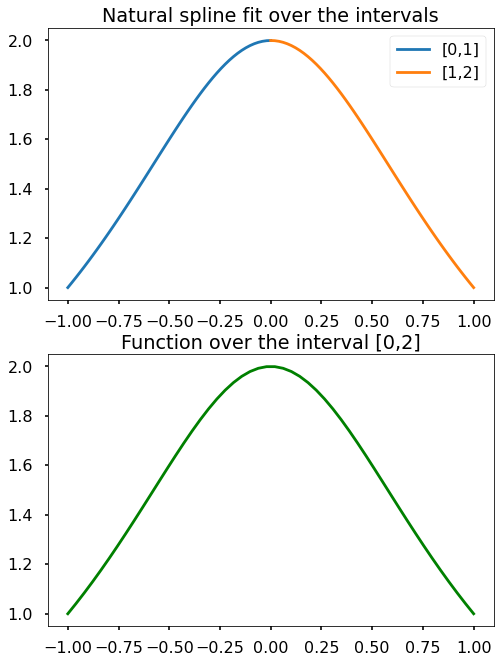

In [ ]:
plt.figure(figsize = (8, 11))

plt.subplot(2,1,1)

plt.plot(x_1,cs_1(x_1), label='[0,1]')
plt.plot(x_2,cs_2(x_2), label='[1,2]')
plt.title('Natural spline fit over the intervals')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,y,color='green')
plt.title('Function over the interval [0,2]')

##### Consider the following differential equation in the domain $[0, 2]$:
\begin{equation}
\frac{df}{dt} = t^2
\end{equation}

Use a collocation finite element method (with linear basis functions) to find $f(t)$ with zero residuals at $t = 0, 1, 2$